<a href="https://colab.research.google.com/github/izumipointer/2022-MSc-Univariate-Regression-Analysis/blob/main/UnivariateRegressionAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction

The data-set to be used can be downloaded from [here](https://drive.google.com/file/d/1aWJgm73Qbsz8aMi-GRuCQgxTjiMnin2t/view?usp=sharing). 



> Download the data


Income - Target variable



## 1. Importing the required libraries 

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns                       #visualisation
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline     
sns.set(color_codes=True)

## 2. Upload the data

 To get or load the dataset into the notebook: 

At the left-hand side of the notebook, you will find a folder. When you click that you will find a tab with three options, you just have to select Files. 

One thing to remember in this step is that uploaded files will get deleted when this runtime is recycled.

## 3. Loading the data into the data frame.

In [ ]:
df = pd.read_csv("Auto.csv")
# To display the top 10 rows 
df.head(10)   


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
5,15.0,8,429.0,198,4341,10.0,70,1,ford galaxie 500
6,14.0,8,454.0,220,4354,9.0,70,1,chevrolet impala
7,14.0,8,440.0,215,4312,8.5,70,1,plymouth fury iii
8,14.0,8,455.0,225,4425,10.0,70,1,pontiac catalina
9,15.0,8,390.0,190,3850,8.5,70,1,amc ambassador dpl


## 4. Checking the types of data




In [ ]:
df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
origin            int64
name             object
dtype: object

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    397 non-null    object 
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.0+ KB


Though horsepower values in the first  rows of the data set are integer, but data type for the column is an object. Hence, we will force convert this column to numeric values ignoring any values that cannot be converted.

In [ ]:
df.horsepower = pd.to_numeric(df.horsepower, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 397 entries, 0 to 396
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           397 non-null    float64
 1   cylinders     397 non-null    int64  
 2   displacement  397 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        397 non-null    int64  
 5   acceleration  397 non-null    float64
 6   year          397 non-null    int64  
 7   origin        397 non-null    int64  
 8   name          397 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.0+ KB


## 5. Use only two columns





We will use only two columns of interest, mpg, and *horsepower*.


In [ ]:
required_df = df[['mpg', 'horsepower']]
required_df.describe()


,mpg,horsepower
count,397.000000,392.000000
mean,23.515869,104.469388
std,7.825804,38.491160
min,9.000000,46.000000
25%,17.500000,75.000000
50%,23.000000,93.500000
75%,29.000000,126.000000
max,46.600000,230.000000


**texte en gras**## 6.  EDA

We will use regplot from seaborn library, which allows us to plot the best fit line over the scatter plot.**texte en gras**

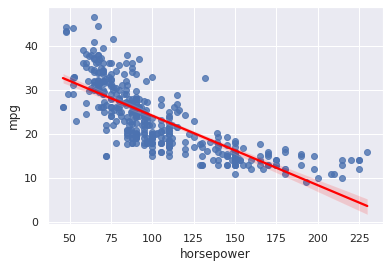

In [ ]:
sns.regplot(x="horsepower", y="mpg", data=required_df, line_kws={'color':'red'})
plt.show()


We can observe from the above plot that linear regression captures the essence of the negative relationship between mpg and horsepower. However, there is some convexity in the relationship that linear regression fails to capture. 

## 7.  Linear Regression in python
To run linear regression in python, we will
 use statsmodel package.

In [ ]:
import statsmodels.formula.api as smf
lin_model = smf.ols("mpg ~ horsepower", data=required_df).fit()
lin_model.summary()

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           7.03e-81
Time:                        21:40:39   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     39.9359      0.717     55.660      0.000      38.525      41.347
horsepower    -0.1578      0.006    -24.489      0.000      -0.171      -0.145
==============================================================================
Omnibus:                       16.432   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.305
Skew:                           0.492   Prob(JB):                     0.000175
Kurtosis:                       3.299   Cond. No.                         322.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**P-values** allow us to test the significance of individual parameters predicted. P-values are almost zero for both the parameters suggests that we can reject the null hypothesis that either intercept or slope parameter is zero with the high confidence level. At the same time, Prob (F-statistic) tests the significance of the complete model as a whole. Again, this statistic’s close to zero value suggests that we can reject the null hypothesis that the model captures no relationship between dependent and independent variables, with high confidence interval.

**R-squared** statistic tells how much variance our model can capture out of total variance in data. The current value suggests we can capture 60.5% of the total variance. The unexplained variance could be two reasons: 1) error term — non-modellable part 2) Biasness in the model — the current model is too simple to capture the actual relationship.

The last portion of the summary, below the red highlighted box, gives information about the error terms. The Durbin-Watson test checks the presence of auto-correlation and the Jarque-Bera test to check if error terms follow a normal distribution.

## 8.  Diagnostic plots
**Linearity:** Residuals should be independent of predicted values. Residual vs. Fitted Values plot should not show any trend, and values should be randomly distributed about the x-axis.
Any pattern in the plot implies some amount of modellable information not captured by the model.*texte en italique*
The linear model already has both residual and fitted values calculated in it.


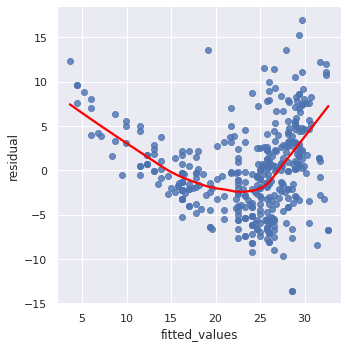

In [ ]:
temp_data = pd.DataFrame(dict(fitted_values=lin_model.fittedvalues, residual=lin_model.resid))
graph = sns.lmplot(x='fitted_values', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})
plt.show()

We can observe a convex pattern in residual, which our linear model does not capture. It is in line with our initial observation that the relationship between mpg and horsepower has some convexity.

**Endogeneity**: This check is similar to the linearity check. It suggests that we should not have any relationship between independent variables (instead of fitted values) and residual terms.

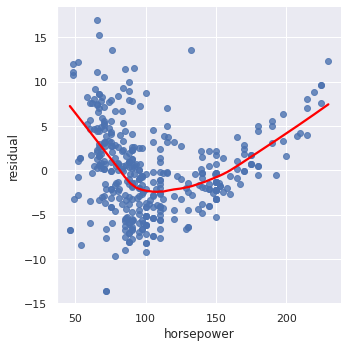

In [ ]:
temp_data = pd.DataFrame(dict(horsepower=required_df.horsepower, residual=lin_model.resid))
graph = sns.lmplot(x='horsepower', y='residual', data=temp_data, lowess=True, line_kws={'color':'red'})


We can observe a similar violation of assumption as linearity. This indicates that estimated parameters might not be an unbiased estimate of actual parameters; hence our model is biased.

**Normality**: Normality assumption has a lot of room to go wrong for model accuracy, but it highly impacts the hypothesis testing values. P-values could be under or over-estimated if residuals deviate too much from a normal distribution. 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


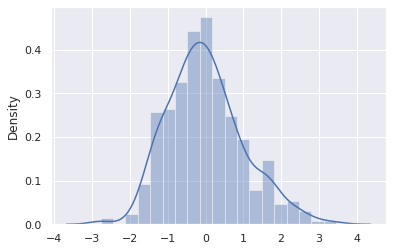

In [ ]:

sns.distplot(lin_model.get_influence().resid_studentized_internal)
plt.show()


Residuals are very close to normally distributed with minor deviations near the tail. The left tail is thinner than the normal distribution, while the right tail is slightly thicker than the normal distribution.


## 9.  Resolving issues from Diagnostic Plots
To capture the convex relationship that we observed in residuals vs. fitted plot, we can add a polynomial of degree two and check if it captures the convex relationship.



In [ ]:
quad_model = smf.ols("mpg ~ horsepower + np.square(horsepower)", data=df[['mpg','horsepower']].reset_index()).fit()
quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.686
Method:                 Least Squares   F-statistic:                     428.0
Date:                Mon, 07 Mar 2022   Prob (F-statistic):           5.40e-99
Time:                        22:07:18   Log-Likelihood:                -1133.2
No. Observations:                 392   AIC:                             2272.
Df Residuals:                     389   BIC:                             2284.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                56.9001      1.800     31.604      0.000      53.360      60.440
horsepower               -0.4662      0.031    -14.978      0.000      -0.527      -0.405
np.square(horsepower)     0.0012      0.000     10.080      0.000       0.001       0.001
==============================================================================
Omnibus:                       16.158   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               30.662
Skew:                           0.218   Prob(JB):                     2.20e-07
Kurtosis:                       4.299   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

It can be observed from summary statistics that the p-value for the square term is close to zero, and hence its significance. We can also see that accuracy of our model has increased as the R-squared term is now ~68%, 8% higher than before.

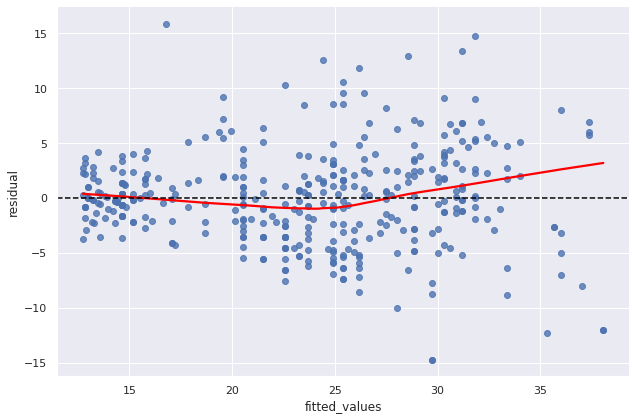

In [ ]:
temp_data = pd.DataFrame(dict(fitted_values=quad_model.fittedvalues, residual=quad_model.resid))
graph = sns.lmplot(x='fitted_values', y='residual', data=temp_data, lowess=True, height=6, aspect=1.5,
                line_kws={'color':'red'})
graph.axes[0][0].axhline(0, color='black', ls='--')
plt.show()

We can observe that trendline has become closer to horizontal. However, we still see a funnel-like structure in residuals with high dispersion towards the right end, indicating the presence of heteroskedasticity.
To resolve the scenario when the funnel opens at the right side, we can transform the dependent variable with the concave function. If the funnel opens at the left side, we try to transform the dependent variable using the convex function.
In the current scenario, we need concave transformation, and the best starting point is to try log transformation.

In [ ]:
log_quad_model = smf.ols("np.log(mpg) ~ horsepower + np.square(horsepower)", data=df[['mpg','horsepower']].reset_index()).fit()
log_quad_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(mpg)   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     532.2
Date:                Mon, 07 Mar 2022   Prob (F-statistic):          4.54e-112
Time:                        22:09:01   Log-Likelihood:                 125.48
No. Observations:                 392   AIC:                            -245.0
Df Residuals:                     389   BIC:                            -233.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 4.4022      0.073     60.639      0.000       4.260       4.545
horsepower               -0.0171      0.001    -13.632      0.000      -0.020      -0.015
np.square(horsepower)  3.901e-05   4.92e-06      7.925      0.000    2.93e-05    4.87e-05
==============================================================================
Omnibus:                        9.051   Durbin-Watson:                   1.092
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               13.714
Skew:                          -0.142   Prob(JB):                      0.00105
Kurtosis:                       3.871   Cond. No.                     1.29e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.29e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The above regression summary statistics indicate that the transformation of the dependent variable increases the model accuracy by ~4.5%.

INITIAL PROPOSED MODEL

mpg = beta_0 + beta_1 horsepower

FINAL DERIVED MODEL

mpg = exp(beta_0 + beta_1 horsepower+beta_2 horsepower^2)
